<a href="https://colab.research.google.com/github/sonar89/Coursera_Capstone/blob/master/BattleofNeighborhoods_NewYork_sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<img src="https://raw.githubusercontent.com/sonar89/Coursera_Capstone/master/ny_main.jpg" />


#**PROJECT: BATTLE OF NEIGHBORHOODS**
_WHERE TO OPEN AN ITALIAN RESTAURANT IN  <font color=blue>MANHATTAN</font> ?_     
               *Serkan ONAR, Nov 2020*



## Introduction



  With its metropolitan property New York City -mostly spelled as New York- is one of the most popular cities in the world. As a metropolitan, New York hosts people from several nations. About 65.2 millions tourists every year visit New York and its magnificient monuments. 
  </font>
    </div>

Over 1.3 million Italians and Italian-Americans live in the greater New York metro area, with about 800,000 living within one of the five New York City boroughs.There is even a neighborhood called Little Italy (Italian: Piccola Italia) is in Lower Manhattan in New York City, once known for its large Italian population(_Wikipedia:Italian Americans in New York City,Little Italy, Manhattan_)
  </font>
    </div>

Italian cuisine such as Pizza,Pasta,Fettuccine,Rizotto,Lasagna with aromatic hause wine and a delicious slice of Tiramisu are very famous actors in gastronomy world.Then what about opening a new fine-dine Italian Restaurant in New York , especially in Manhattan, among skyscrappers or near Central Park ? As an investor, where to choose the best location in Manhattan ? **(Business problem)**

## Data

Based on the business problem , we need following data ;

  </font>
    </div>

  1-New York City data including the boroughs,neighborhoods, geographical coordinates.
      </font>
    </div>

Data source: [https://geo.nyu.edu/catalog/nyu_2451_34572](https://geo.nyu.edu/catalog/nyu_2451_34572?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
    </font>
    </div>

Description : We will get New York districts (Borough-Neighborhood) table and get geographical coordinates.

  2-Polygon file of Manhattan boundaries.
        </font>
    </div>
    
Data source: https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/manhattan.geojson 
(I have modified it a little bit)
    </font>
    </div>

Description : We will get Manhattan neighborhood map to visualize potential places.
      </font>
    </div>

  3-Venue information in each neighborhood of New York:
        </font>
    </div>
    
Data source: Foursquare developer-API
      </font>
    </div>
    
Description : By using this API we will collect all venue information in each neighborhood.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Download and Explore Dataset</a>

2.  <a href="#item2">Explore Neighborhoods in New York City</a>

3.  <a href="#item3">Analyze Each Neighborhood</a>

4.  <a href="#item4">Cluster Neighborhoods</a>

5.  <a href="#item5">Examine Clusters</a>  
    </font>
    </div>


Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
Libraries imported.


<a id='item1'></a>


## 1. Download and Explore Dataset


***New York City*** has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

I run a `wget` command and access the location data which is already in IBM server. 


In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


#### Load and explore the data


Next, let's load the data.


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.


In [56]:
#newyork_data

Notice how all the relevant data is in the _features_ key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


In [6]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.


In [7]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

#### Tranform the data into a _pandas_ dataframe


The next task is essentially transforming this data of nested Python dictionaries into a _pandas_ dataframe. So let's start by creating an empty dataframe.


In [8]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.


In [9]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.


In [10]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [11]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.


In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.


In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.


In [15]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.


In [16]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualize Manhattan the neighborhoods in it.


In [17]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [18]:
CLIENT_ID = 'JDXGXVC4WXWJSBL423YT1MFQYXK1EFWX5FGCY2GVWIVCSOTD' # your Foursquare ID
CLIENT_SECRET = '4J0BJK5HYDYQPUTLMP2JQ02IBXBZGUB5L3SBD30XNCFVVQIL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JDXGXVC4WXWJSBL423YT1MFQYXK1EFWX5FGCY2GVWIVCSOTD
CLIENT_SECRET:4J0BJK5HYDYQPUTLMP2JQ02IBXBZGUB5L3SBD30XNCFVVQIL


#### Let's explore the first neighborhood in our dataframe.


Get the neighborhood's name.


In [19]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.


In [20]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.


In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## 2. Explore Neighborhoods in Manhattan


#### Let's create a function getting the top 100 venues in all Neighborhoods of Manhattan within a radius of 500 meters.



In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _manhattan_venues_.


In [23]:
# type your answer here
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's check the size of the resulting dataframe


In [24]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3219, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


Let's check how many venues were returned for each neighborhood


In [25]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,66,66,66,66,66,66
Carnegie Hill,86,86,86,86,86,86
Central Harlem,46,46,46,46,46,46
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues


In [26]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 323 uniques categories.


<a id='item3'></a>


## 3. Analyze Each Neighborhood


In [27]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South Indian Restaurant,Southern / Soul Food Res

And let's examine the new dataframe size.


In [28]:
manhattan_onehot.shape

(3219, 324)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [29]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South Indian Restaurant,Southern / Soul Food Res

#### Let's confirm the new size


In [30]:
manhattan_grouped.shape

(40, 324)

#### Let's print each neighborhood along with the top 5 most common venues


In [31]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.09
1          Hotel  0.08
2    Coffee Shop  0.06
3            Gym  0.06
4  Memorial Site  0.05


----Carnegie Hill----
                venue  freq
0         Coffee Shop  0.09
1                Café  0.05
2  Italian Restaurant  0.03
3   French Restaurant  0.03
4                 Gym  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1                  Bar  0.07
2    French Restaurant  0.04
3  American Restaurant  0.04
4       Cosmetics Shop  0.04


----Chelsea----
                 venue  freq
0          Coffee Shop  0.09
1          Art Gallery  0.05
2  American Restaurant  0.04
3               Bakery  0.04
4   Italian Restaurant  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.07
1         Dessert Shop  0.05
2         Cocktail Bar  0.05
3               Bakery  0.05
4  American Restaurant  0.04


----Civic Center----
                  venue  freq
0     

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Coffee Shop,Memorial Site,Shopping Mall,Plaza,Burger Joint,Gourmet Shop,Playground
1,Carnegie Hill,Coffee Shop,Café,Bookstore,Italian Restaurant,Gym / Fitness Center,Gym,French Restaurant,Yoga Studio,Wine Shop,Vietnamese Restaurant
2,Central Harlem,African Restaurant,Bar,French Restaurant,American Restaurant,Chinese Restaurant,Seafood Restaurant,Cosmetics Shop,Cafeteria,Grocery Store,Library
3,Chelsea,Coffee Shop,Art Gallery,Bakery,American Restaurant,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Park,Cycle Studio,Cupcake Shop
4,Chinatown,Chinese Restaurant,Cocktail Bar,Dessert Shop,Bakery,American Restaurant,Salon / Barbershop,Spa,Noodle House,Optical Shop,Hotpot Restaurant


In [34]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Coffee Shop,Memorial Site,Shopping Mall,Plaza,Burger Joint,Gourmet Shop,Playground
1,Carnegie Hill,Coffee Shop,Café,Bookstore,Italian Restaurant,Gym / Fitness Center,Gym,French Restaurant,Yoga Studio,Wine Shop,Vietnamese Restaurant
2,Central Harlem,African Restaurant,Bar,French Restaurant,American Restaurant,Chinese Restaurant,Seafood Restaurant,Cosmetics Shop,Cafeteria,Grocery Store,Library
3,Chelsea,Coffee Shop,Art Gallery,Bakery,American Restaurant,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Park,Cycle Studio,Cupcake Shop
4,Chinatown,Chinese Restaurant,Cocktail Bar,Dessert Shop,Bakery,American Restaurant,Salon / Barbershop,Spa,Noodle House,Optical Shop,Hotpot Restaurant
5,Civic Center,Coffee Shop,Gym / Fitness Center,Spa,Cocktail Bar,Hotel,French Restaurant,Yoga Studio,American Restaurant,Sushi Restaurant,Sandwich Place
6,Clinton,Theater,American Restaurant,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Sandwich Place,Gym,Hotel,Italian Restaurant,Spa
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Sandwich Place,French Restaurant,Cocktail Bar,Beer Bar,Grocery Store
8,East Village,Bar,Ice Cream Shop,Mexican Restaurant,Pizza Place,Wine Bar,Korean Restaurant,Speakeasy,Italian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop
9,Financial District,Coffee Shop,Pizza Place,Cocktail Bar,Café,Bar,Gym,Juice Bar,Park,Steakhouse,Salad Place


<a id='item4'></a>


## 4. Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [35]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 3, 0, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Gym,Discount Store,Coffee Shop,Sandwich Place,Yoga Studio,Pizza Place,Deli / Bodega,Department Store,Pharmacy,Diner
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,Dessert Shop,Bakery,American Restaurant,Salon / Barbershop,Spa,Noodle House,Optical Shop,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Latin American Restaurant,Deli / Bodega,New American Restaurant,Donut Shop,Mobile Phone Shop,Chinese Restaurant,Sandwich Place
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Restaurant,Café,Frozen Yogurt Shop,Deli / Bodega,Pizza Place,Wine Bar,Caribbean Restaurant,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Cocktail Bar,Indian Restaurant,Liquor Store,Sushi Restaurant,Park,Deli / Bodega


In [37]:
manhattan_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Gym,Discount Store,Coffee Shop,Sandwich Place,Yoga Studio,Pizza Place,Deli / Bodega,Department Store,Pharmacy,Diner
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,Dessert Shop,Bakery,American Restaurant,Salon / Barbershop,Spa,Noodle House,Optical Shop,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Latin American Restaurant,Deli / Bodega,New American Restaurant,Donut Shop,Mobile Phone Shop,Chinese Restaurant,Sandwich Place
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Restaurant,Café,Frozen Yogurt Shop,Deli / Bodega,Pizza Place,Wine Bar,Caribbean Restaurant,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Cocktail Bar,Indian Restaurant,Liquor Store,Sushi Restaurant,Park,Deli / Bodega
5,Manhattan,Manhattanville,40.816934,-73.957385,3,Seafood Restaurant,Coffee Shop,Bar,Deli / Bodega,Italian Restaurant,Park,Mexican Restaurant,Spanish Restaurant,Gastropub,Lounge
6,Manhattan,Central Harlem,40.815976,-73.943211,1,African Restaurant,Bar,French Restaurant,American Restaurant,Chinese Restaurant,Seafood Restaurant,Cosmetics Shop,Cafeteria,Grocery Store,Library
7,Manhattan,East Harlem,40.792249,-73.944182,3,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Sandwich Place,French Restaurant,Cocktail Bar,Beer Bar,Grocery Store
8,Manhattan,Upper East Side,40.775639,-73.960508,1,Exhibit,Italian Restaurant,Coffee Shop,Bakery,Gym / Fitness Center,Yoga Studio,Cosmetics Shop,French Restaurant,Juice Bar,Spa
9,Manhattan,Yorkville,40.775930,-73.947118,0,Italian Restaurant,Coffee Shop,Gym,Bar,Deli / Bodega,Sushi Restaurant,Japanese Restaurant,Wine Shop,Diner,Mexican Restaurant


Finally, let's visualize the resulting clusters


In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude],tiles='cartodbpositron', zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


## 5. Examine Clusters


Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I assign Cluster 1 as 'Restaurants Area'. 


#### Cluster 1- Restaurants Area


In [39]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Latin American Restaurant,Deli / Bodega,New American Restaurant,Donut Shop,Mobile Phone Shop,Chinese Restaurant,Sandwich Place
4,Hamilton Heights,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Cocktail Bar,Indian Restaurant,Liquor Store,Sushi Restaurant,Park,Deli / Bodega
9,Yorkville,Italian Restaurant,Coffee Shop,Gym,Bar,Deli / Bodega,Sushi Restaurant,Japanese Restaurant,Wine Shop,Diner,Mexican Restaurant
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Pizza Place,Coffee Shop,Cocktail Bar,Gym,Gym / Fitness Center,Café,Burger Joint,Salon / Barbershop
12,Upper West Side,Italian Restaurant,Café,Bar,Indian Restaurant,Wine Bar,Pizza Place,Bakery,Coffee Shop,Vegetarian / Vegan Restaurant,Thai Restaurant
13,Lincoln Square,Plaza,Café,Concert Hall,Performing Arts Venue,Theater,Italian Restaurant,Gym / Fitness Center,French Restaurant,Indie Movie Theater,Wine Shop
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Clothing Store,Café,Indian Restaurant,American Restaurant,Gym,Boutique,Bubble Tea Shop,Chinese Restaurant
19,East Village,Bar,Ice Cream Shop,Mexican Restaurant,Pizza Place,Wine Bar,Korean Restaurant,Speakeasy,Italian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop
21,Tribeca,American Restaurant,Park,Wine Bar,Italian Restaurant,Café,Greek Restaurant,Spa,Coffee Shop,Skate Park,Steakhouse
22,Little Italy,Café,Bakery,Italian Restaurant,Bubble Tea Shop,Chinese Restaurant,Cocktail Bar,Mediterranean Restaurant,Ice Cream Shop,Sandwich Place,Coffee Shop


#### Cluster 2


In [40]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dessert Shop,Bakery,American Restaurant,Salon / Barbershop,Spa,Noodle House,Optical Shop,Hotpot Restaurant
6,Central Harlem,African Restaurant,Bar,French Restaurant,American Restaurant,Chinese Restaurant,Seafood Restaurant,Cosmetics Shop,Cafeteria,Grocery Store,Library
8,Upper East Side,Exhibit,Italian Restaurant,Coffee Shop,Bakery,Gym / Fitness Center,Yoga Studio,Cosmetics Shop,French Restaurant,Juice Bar,Spa
11,Roosevelt Island,Playground,Deli / Bodega,School,Greek Restaurant,Supermarket,Bubble Tea Shop,Pizza Place,Food & Drink Shop,Soccer Field,Farmers Market
14,Clinton,Theater,American Restaurant,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Sandwich Place,Gym,Hotel,Italian Restaurant,Spa
15,Midtown,Hotel,Coffee Shop,Bakery,Clothing Store,Theater,Steakhouse,Sporting Goods Shop,Sushi Restaurant,Bookstore,Pizza Place
16,Murray Hill,Japanese Restaurant,Coffee Shop,Hotel,Gym / Fitness Center,Sandwich Place,American Restaurant,Bar,Restaurant,Pizza Place,Italian Restaurant
17,Chelsea,Coffee Shop,Art Gallery,Bakery,American Restaurant,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Park,Cycle Studio,Cupcake Shop
20,Lower East Side,Chinese Restaurant,Japanese Restaurant,Ramen Restaurant,Pizza Place,Art Gallery,Pharmacy,Bakery,Café,Coffee Shop,Mexican Restaurant
25,Manhattan Valley,Bar,Coffee Shop,Yoga Studio,Pizza Place,Playground,Thai Restaurant,Mexican Restaurant,Cosmetics Shop,Gym / Fitness Center,Latin American Restaurant


#### Cluster 3


In [41]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Pet Service,Gym / Fitness Center,Harbor / Marina,Coffee Shop,Baseball Field,Bar,Bistro,Heliport,Farmers Market


#### Cluster 4


In [42]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Restaurant,Café,Frozen Yogurt Shop,Deli / Bodega,Pizza Place,Wine Bar,Caribbean Restaurant,Park
5,Manhattanville,Seafood Restaurant,Coffee Shop,Bar,Deli / Bodega,Italian Restaurant,Park,Mexican Restaurant,Spanish Restaurant,Gastropub,Lounge
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Sandwich Place,French Restaurant,Cocktail Bar,Beer Bar,Grocery Store
26,Morningside Heights,Park,American Restaurant,Coffee Shop,Bookstore,Burger Joint,Café,Deli / Bodega,Pub,Paper / Office Supplies Store,Seafood Restaurant
36,Tudor City,Café,Park,Mexican Restaurant,Asian Restaurant,Diner,Deli / Bodega,Coffee Shop,Sushi Restaurant,Gym,Dog Run


#### Cluster 5


In [43]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Gym,Discount Store,Coffee Shop,Sandwich Place,Yoga Studio,Pizza Place,Deli / Bodega,Department Store,Pharmacy,Diner


## Italian Restaurant Investigation

Let's list the Italian restaurants in Manhattan

In [44]:
it_rest_filter = manhattan_venues[manhattan_venues['Venue Category'] == 'Italian Restaurant']
it_rest_filter.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
86,Chinatown,40.715618,-73.994279,Bacaro,40.714468,-73.991589,Italian Restaurant
125,Washington Heights,40.851903,-73.936900,Saggio Restaurant,40.851423,-73.939761,Italian Restaurant
206,Washington Heights,40.851903,-73.936900,Pollo El Provocon,40.851715,-73.932571,Italian Restaurant
269,Hamilton Heights,40.823604,-73.949688,Fumo,40.821412,-73.950499,Italian Restaurant
340,Manhattanville,40.816934,-73.957385,Pisticci Ristorante,40.814015,-73.960266,Italian Restaurant


Most common 10 venues in neighborhoods of Manhattan

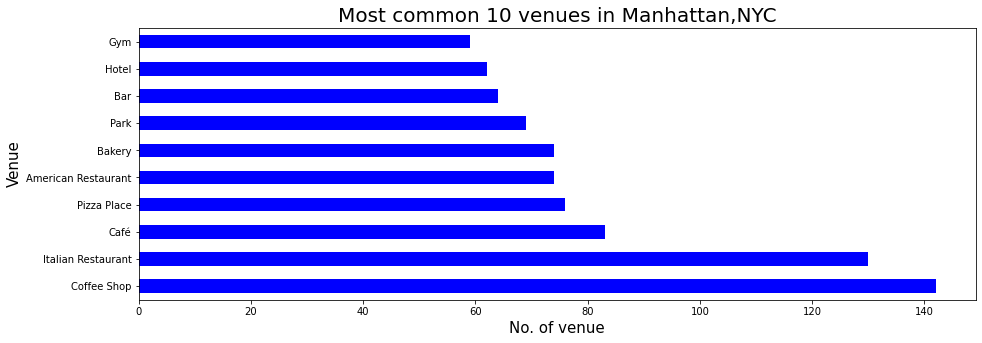

In [45]:
manhattan_venues
%matplotlib inline
max_nr=10
manhattan_venues.groupby('Venue Category')['Venue'].count().nlargest(max_nr).plot.barh(figsize=(15,5), color='blue')
plt.title('Most common 10 venues in Manhattan,NYC', fontsize = 20)
plt.xlabel('No. of venue', fontsize = 15)
plt.ylabel('Venue', fontsize=15)
plt.xticks(rotation = 'horizontal')
#plt.legend()
plt.show()

This chart gives us the idea of Italian Restaurant investment is a good option. It is the most popular in Manhattan.

Top10 neighborhoods in Manhattan having most Italian restaurants

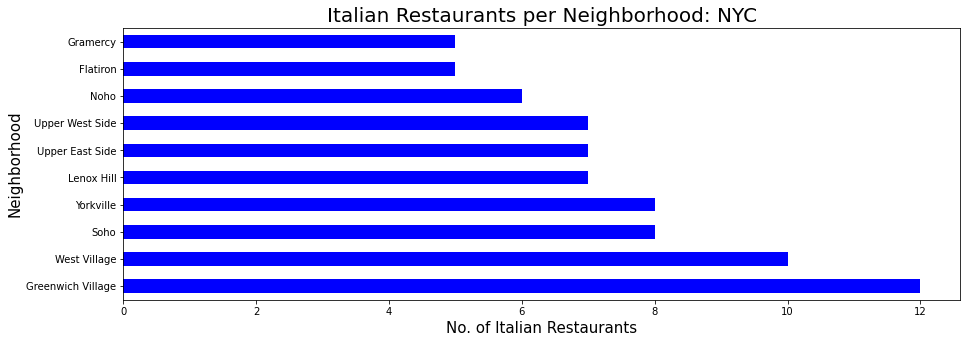

In [46]:
%matplotlib inline
max_nr=10
it_rest_filter.groupby('Neighborhood')['Venue Latitude'].count().nlargest(max_nr).plot.barh(figsize=(15,5), color='blue')
plt.title('Italian Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('No. of Italian Restaurants', fontsize = 15)
plt.ylabel('Neighborhood', fontsize=15)
plt.xticks(rotation = 'horizontal')
#plt.legend()
plt.show()

This chart support our decision for Cluster1 area. Most of italian restaurants are located in Cluster1 areas(Greenwich Village,West Village,Soho,Yorkville)

In [55]:
it_rest_counter=pd.DataFrame(it_rest_filter.groupby('Neighborhood')['Venue'].count())
it_rest_counter.rename(columns = {'Venue':'Counter'}, inplace = True) #counter refers to italian restaurant count in that Neighborhood
it_rest_counterbar=it_rest_counter
it_rest_counterbar=it_rest_counterbar.reset_index(inplace=False)
it_rest_counterbar.head()

,Neighborhood,Counter
0,Battery Park City,1
1,Carnegie Hill,3
2,Chelsea,3
3,Chinatown,1
4,Civic Center,2


Let's visualize the most potential restaurant areas in map

In [54]:
latitude=40.758896
longitude= -73.985130
#gjson = r'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/manhattan.geojson'
gjson = r'https://raw.githubusercontent.com/sonar89/Coursera_Capstone/master/manhattan2.geojson.json' #i have modified the orijinal json file a little bit.
#tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']'
map333 = folium.Map(location=[latitude, longitude],tiles='cartodbpositron', zoom_start=10.5)
#generate map
#map333.choropleth(
choropleth = folium.Choropleth(
    geo_data=gjson,
    data=it_rest_counterbar,
    #columns=['Neighborhood', 'Counter','Cluster Labels'],
    columns=['Neighborhood', 'Counter'],
    #key_on='feature.properties.DISTRICT',
    key_on='feature.properties.name',
    #fill_color='BuPu', 
    #fill_color='YlGn',
    fill_color='YlOrRd',
    nan_fill_color='grey',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Italian restaurant counts /Manhattan neighborhoods'
).add_to(map333)


folium.LayerControl().add_to(map333)
# Display Region Label
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False)
    
)
map333

**END OF PROJECT...
PLEASE FIND FINAL COMMENTS IN PROJECT REPORT...**